In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

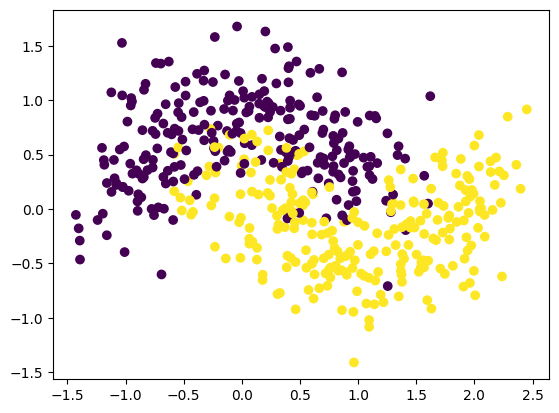

In [2]:
X,y=make_moons(n_samples=500,noise=0.3,random_state=0)
plt.scatter(X[:,0],X[:,1],c=y)

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3) 

Voting classifier

In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

In [8]:
model_1=SGDClassifier(random_state=0)
model_2=DecisionTreeClassifier(random_state=0)
model_3=KNeighborsClassifier(n_neighbors=2)


model_4=VotingClassifier(estimators=[('SGD',model_1),('Tree',model_2),('KNN',model_3)],voting='hard')
for model in (model_1,model_2,model_3,model_4):
    model.fit(X_train,y_train)
    print(model.__class__.__name__,model.score(X_test,y_test))

SGDClassifier 0.84
DecisionTreeClassifier 0.86
KNeighborsClassifier 0.86
VotingClassifier 0.8733333333333333


Bagging
//over fitting 
//same model different train set

In [9]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

In [10]:
model=BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=100)

model.fit(X_train,y_train)
print(model.score(X_test,y_test))

0.8866666666666667


C:\Users\azizm.AZIZ-PC\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [13]:
model=RandomForestClassifier(n_estimators=10000)
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

0.8733333333333333


Boosting
//perfor drop
//different models that correct the errors of the previous

In [14]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [15]:
model=AdaBoostClassifier(n_estimators=100)
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

0.88


Staking
//models very good
//ye3alam 3ala prediction ily kablou

In [16]:
from sklearn.ensemble import StackingClassifier

In [18]:
model_4=StackingClassifier(estimators=[('SGD',model_1),('Tree',model_2),('KNN',model_3)],final_estimator=KNeighborsClassifier())
model_4.fit(X_train,y_train)
print(model_4.score(X_test,y_test))

0.8666666666666667
